

# Simple Linear Regression


## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model


### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
%matplotlib inline

## Understanding the Data

### `Fuel_Consumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in


In [4]:
df= pd.read_csv("../data/FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.shape

(1067, 13)

### Data Exploration

Let's first have a descriptive exploration on our data.


In [ ]:
df.head()

In [6]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let's select some features to explore more.


In [7]:
# to print all the column names
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
# creating a sub-dataframe
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


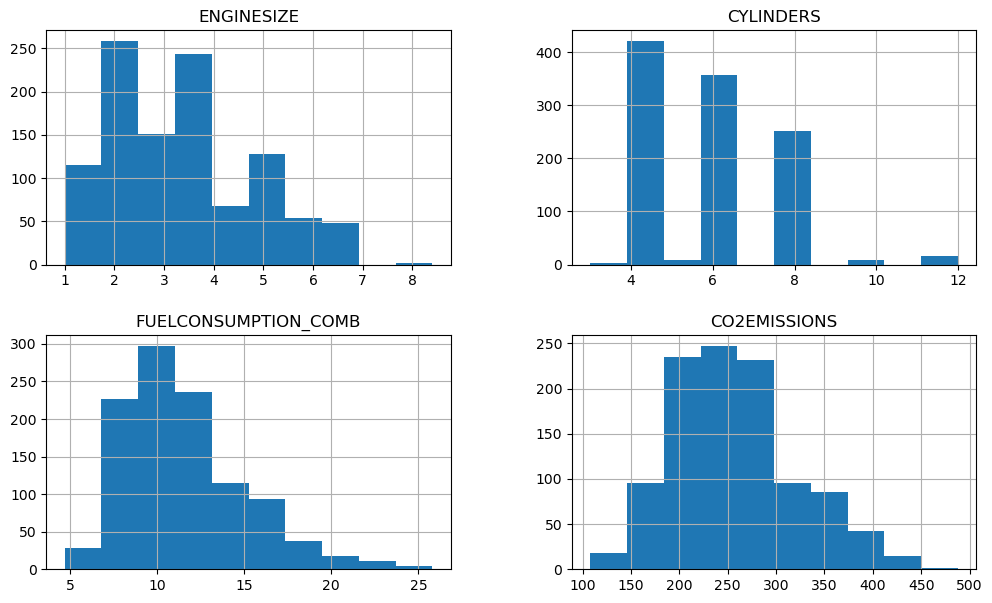

In [10]:
figsize=(10, 10)

# visualization
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist(figsize=(12, 7))
plt.show()

Now, let's plot each of these features against the Emission, to see how linear their relationship is:


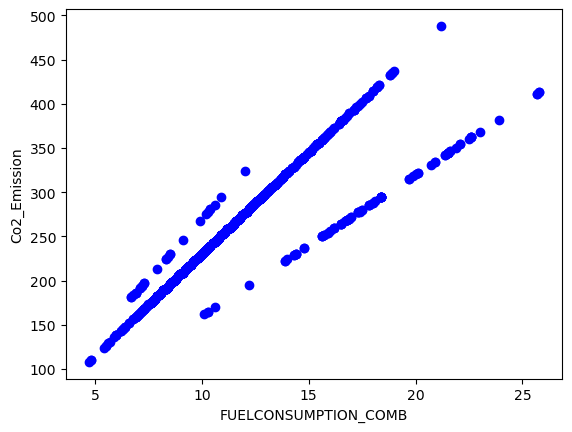

In [11]:
#'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'
plt.scatter(cdf["FUELCONSUMPTION_COMB"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Co2_Emission")
plt.show()

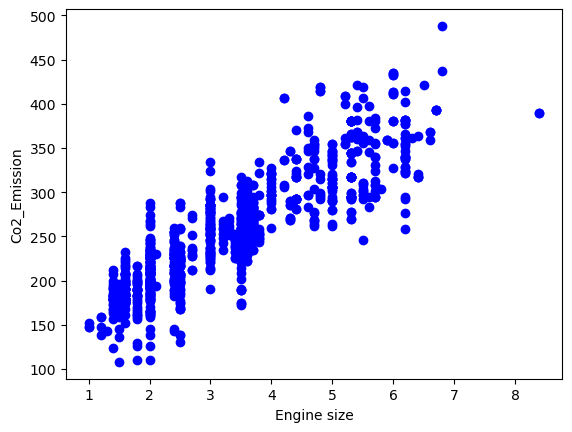

In [12]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Co2_Emission")
plt.show()

## Seaborn

https://seaborn.pydata.org/generated/seaborn.pairplot.html


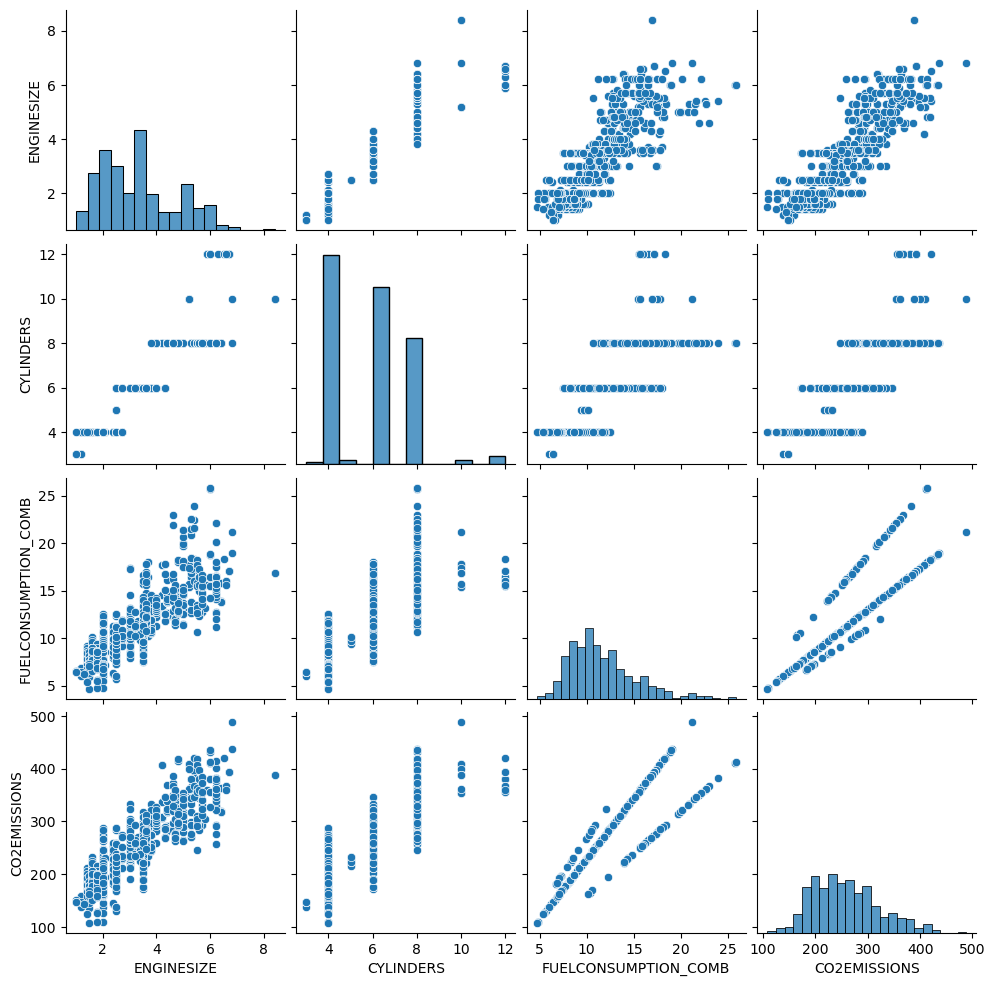

In [13]:
import seaborn as sns
sns.pairplot(cdf)

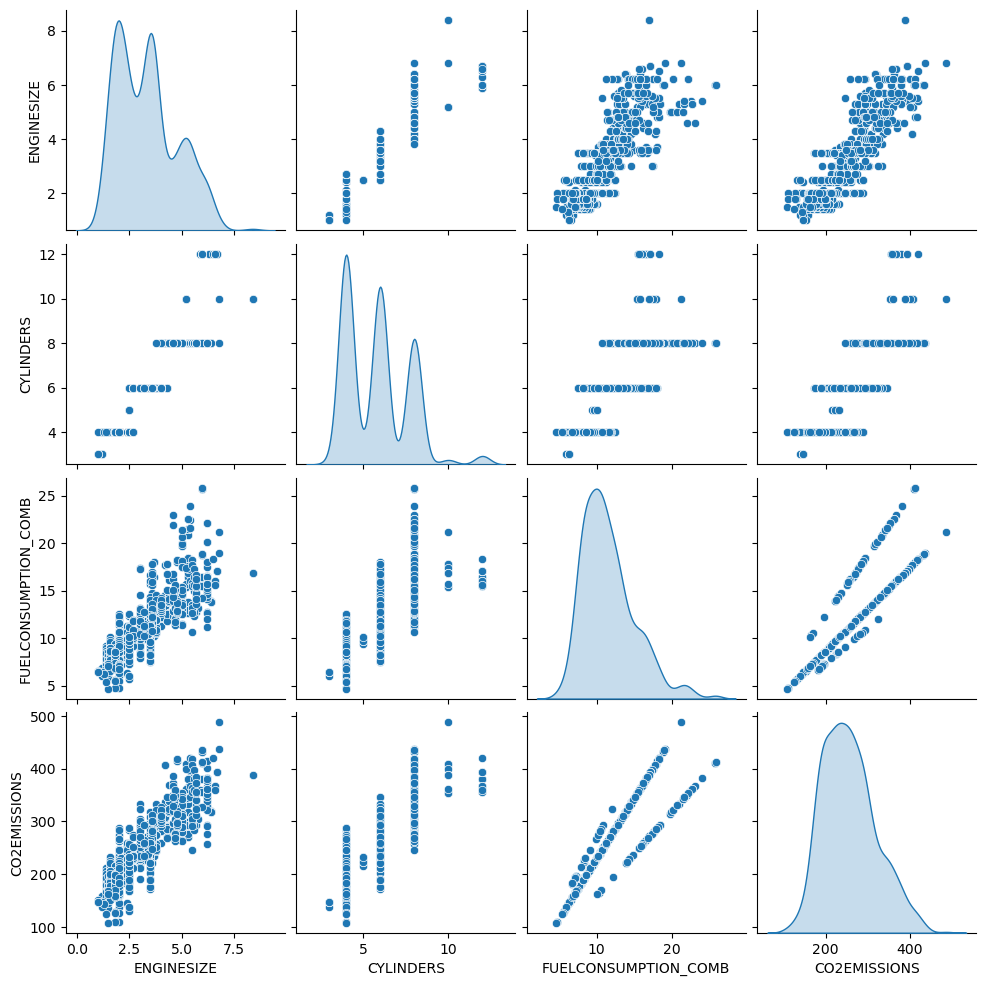

In [14]:
# changing the plot
sns.pairplot(cdf, diag_kind = "kde")

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.


In [15]:
cdf.shape

(1067, 4)

In [16]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [17]:
X = cdf["ENGINESIZE"]
y = cdf["CO2EMISSIONS"]

In [18]:
X = np.array(X)
X

array([2. , 2.4, 1.5, ..., 3. , 3.2, 3.2])

In [19]:
y = np.array(y)
y

array([196, 221, 136, ..., 271, 260, 294])

In [20]:
X.shape

(1067,)

In [21]:
y.shape

(1067,)

### Why is Reshaping Necessary?

Reshaping an array is often necessary in linear regression, especially when working with libraries like scikit-learn in Python. The main reasons for reshaping are:

Consistent Data Structure: Linear regression models expect input data in a specific shape. Even if you have a single feature, the model expects it to be presented as a two-dimensional array or matrix where each row is a sample and each column is a feature. For example, if you have an array of shape (n,), many machine learning libraries expect it to be reshaped to (n, 1).

In [22]:
X = np.array(cdf["ENGINESIZE"]).reshape(-1, 1)
y = np.array(cdf["CO2EMISSIONS"]).reshape(-1, 1)

In [23]:
X.shape

(1067, 1)

In [24]:
y.shape

(1067, 1)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (853, 1) (853, 1)
Test set: (214, 1) (214, 1)


#### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


#### Train data distribution


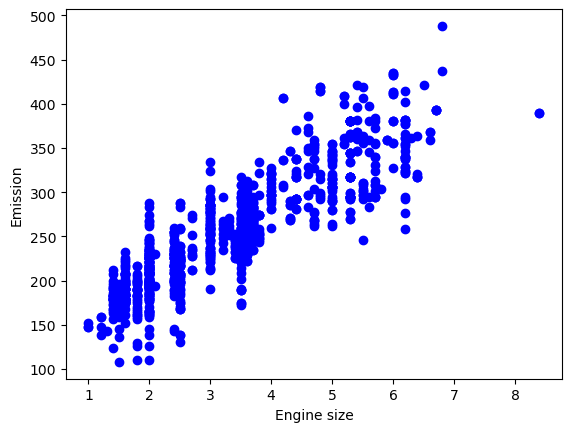

In [26]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [27]:
X_test

array([[3.7],
       [2. ],
       [3.5],
       [3.5],
       [4.4],
       [3.5],
       [1.4],
       [1.6],
       [5. ],
       [3. ],
       [2.5],
       [3. ],
       [5.3],
       [3.7],
       [2. ],
       [6.2],
       [4. ],
       [6.2],
       [5.4],
       [3. ],
       [2. ],
       [3. ],
       [2.5],
       [3. ],
       [5. ],
       [2. ],
       [2.5],
       [3.5],
       [1.4],
       [2. ],
       [6.2],
       [2. ],
       [3.5],
       [1.6],
       [3.5],
       [1.4],
       [1.6],
       [3.6],
       [6.2],
       [4. ],
       [2. ],
       [3. ],
       [3.5],
       [2.4],
       [5.3],
       [2. ],
       [3.3],
       [2.4],
       [3. ],
       [5.5],
       [3.6],
       [3.6],
       [2.5],
       [6.2],
       [4.6],
       [6. ],
       [2. ],
       [3.6],
       [2.5],
       [2.4],
       [2. ],
       [2.5],
       [3. ],
       [5. ],
       [3.5],
       [4.6],
       [3.6],
       [3.4],
       [3.5],
       [3.5],
       [2.7],
      

In [28]:
y_test

array([[262],
       [237],
       [258],
       [271],
       [292],
       [260],
       [124],
       [177],
       [334],
       [285],
       [228],
       [260],
       [317],
       [253],
       [212],
       [294],
       [315],
       [340],
       [346],
       [260],
       [274],
       [285],
       [198],
       [264],
       [345],
       [193],
       [239],
       [278],
       [182],
       [200],
       [352],
       [225],
       [242],
       [184],
       [294],
       [177],
       [184],
       [255],
       [338],
       [322],
       [225],
       [292],
       [276],
       [255],
       [366],
       [193],
       [267],
       [230],
       [258],
       [297],
       [274],
       [259],
       [186],
       [361],
       [347],
       [356],
       [207],
       [250],
       [216],
       [212],
       [232],
       [207],
       [277],
       [315],
       [256],
       [320],
       [259],
       [239],
       [244],
       [253],
       [230],
      

#### Modeling

Using sklearn package to model data.


In [29]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.116937]]
Intercept:  [125.14677576]


In [30]:
regr.coef_.shape

(1, 1)

In [31]:
regr.intercept_.shape

(1,)

As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.


#### Plot outputs


We can plot the fit line over the data:


In [32]:
regr.coef_[0][0]

39.11693699721636

In [33]:
regr.intercept_[0]

125.14677575630918

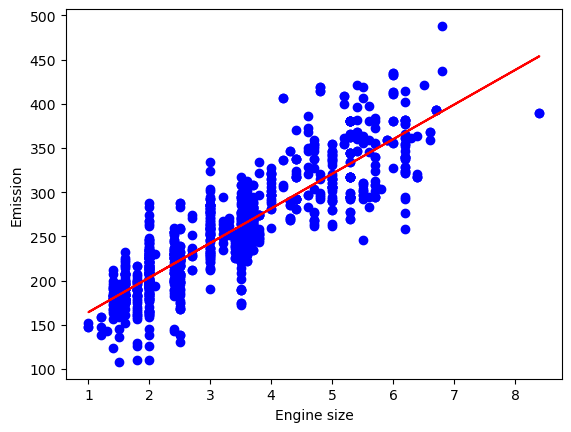

In [34]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"],  color='blue')

plt.plot(cdf["ENGINESIZE"], regr.coef_[0][0]*cdf["ENGINESIZE"].values + regr.intercept_[0], '-r')
plt.xlabel("Engine size");
plt.ylabel("Emission");

In [35]:
y_train

array([[196],
       [205],
       [264],
       [246],
       [336],
       [285],
       [278],
       [207],
       [209],
       [368],
       [342],
       [216],
       [396],
       [271],
       [278],
       [191],
       [237],
       [221],
       [334],
       [276],
       [251],
       [354],
       [194],
       [251],
       [253],
       [235],
       [350],
       [170],
       [214],
       [269],
       [184],
       [186],
       [359],
       [346],
       [205],
       [200],
       [285],
       [344],
       [166],
       [200],
       [294],
       [244],
       [251],
       [320],
       [221],
       [347],
       [184],
       [177],
       [294],
       [260],
       [182],
       [239],
       [264],
       [255],
       [175],
       [290],
       [362],
       [147],
       [269],
       [202],
       [161],
       [230],
       [200],
       [230],
       [264],
       [179],
       [242],
       [294],
       [317],
       [182],
       [198],
      

In [36]:
y_pred_dummy = regr.predict(X_train)
y_pred_dummy

array([[183.82218125],
       [195.55726235],
       [265.96774895],
       [340.28992924],
       [320.73146074],
       [265.96774895],
       [265.96774895],
       [203.38064975],
       [203.38064975],
       [383.31855994],
       [320.73146074],
       [203.38064975],
       [336.37823554],
       [254.23266785],
       [242.49758675],
       [195.55726235],
       [265.96774895],
       [222.93911825],
       [332.46654184],
       [308.99637964],
       [230.76250565],
       [320.73146074],
       [207.29234345],
       [262.05605525],
       [262.05605525],
       [230.76250565],
       [308.99637964],
       [203.38064975],
       [203.38064975],
       [308.99637964],
       [187.73387495],
       [219.02742455],
       [355.93670404],
       [336.37823554],
       [187.73387495],
       [203.38064975],
       [242.49758675],
       [332.46654184],
       [195.55726235],
       [203.38064975],
       [348.11331664],
       [262.05605525],
       [219.02742455],
       [375

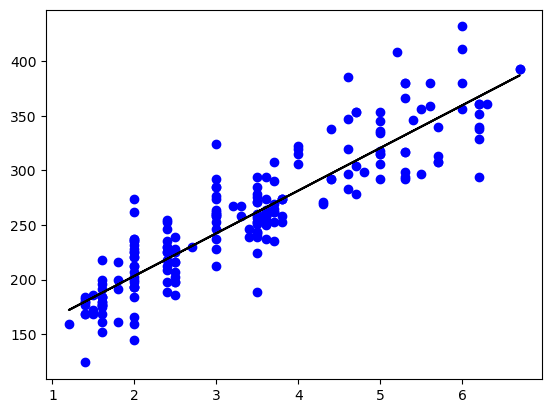

In [37]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [38]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 687.19
Mean absolute error: 19.98
Coefficient of determination(r2): 0.81


# Polynomial Regression

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

$$y = b + \theta\_1  x + \theta\_2 x^2$$

Now, the question is: how we can fit our data on this equation while we have only x values, such as **Engine Size**?
Well, we can create a few additional features: 1, $x$, and $x^2$.

**PolynomialFeatures()** function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, *ENGINESIZE*. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:


In [57]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
409,1.5,4,10.1,6.6,8.5
773,1.8,4,10.3,7.2,8.9
146,3.6,6,13.7,8.9,11.5
776,5.5,8,12.3,8.7,10.7
381,5.0,8,16.4,12.3,14.6
...,...,...,...,...,...
456,5.3,8,19.5,13.7,16.9
360,2.0,4,11.2,8.5,10.0
709,2.0,4,8.2,5.9,7.2
439,5.3,8,18.6,13.9,16.5


In [59]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_poly

array([[  1.  ,   1.5 ,   4.  , ...,  43.56,  56.1 ,  72.25],
       [  1.  ,   1.8 ,   4.  , ...,  51.84,  64.08,  79.21],
       [  1.  ,   3.6 ,   6.  , ...,  79.21, 102.35, 132.25],
       ...,
       [  1.  ,   2.  ,   4.  , ...,  34.81,  42.48,  51.84],
       [  1.  ,   5.3 ,   8.  , ..., 193.21, 229.35, 272.25],
       [  1.  ,   6.2 ,   8.  , ..., 156.25, 185.  , 219.04]])

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

The equation and the sample example is displayed below.

$$
\begin{bmatrix}
v\_1\\\\
v\_2\\\\
\vdots\\\\
v_n
\end{bmatrix}\longrightarrow \begin{bmatrix}
\[ 1 & v\_1 & v\_1^2]\\\\
\[ 1 & v\_2 & v\_2^2]\\\\
\vdots & \vdots & \vdots\\\\
\[ 1 & v_n & v_n^2]
\end{bmatrix}
$$

$$
\begin{bmatrix}
2.\\\\
2.4\\\\
1.5\\\\
\vdots
\end{bmatrix} \longrightarrow \begin{bmatrix}
\[ 1 & 2. & 4.]\\\\
\[ 1 & 2.4 & 5.76]\\\\
\[ 1 & 1.5 & 2.25]\\\\
\vdots & \vdots & \vdots\\\\
\end{bmatrix}
$$


It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  𝑥  with  𝑥_1 ,  𝑥_12  with  𝑥_2 , and so on. Then the degree 2 equation would be turn into:

𝑦=𝑏+𝜃_1𝑥_1+𝜃_2𝑥_2
 
Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use LinearRegression() function to solve it:

In [60]:
poly_LR = linear_model.LinearRegression()
poly_LR.fit(X_train_poly, y_train)
# The coefficients
print ('Coefficients: ', poly_LR.coef_)
print ('Intercept: ',poly_LR.intercept_)

Coefficients:  [ 0.00000000e+00  5.34377672e-01 -9.28318514e+00 -9.46435423e+01
 -7.94598973e+01  2.04196196e+02  5.96768789e+00 -1.17948428e+01
 -1.49819297e+01 -3.44071931e+00  2.29822963e+01  2.37156478e+00
 -2.19894703e+01 -2.32978257e+01  4.65716022e+01  1.71450458e+02
  2.65645352e+02 -5.86709345e+02  1.04280363e+02 -4.55182757e+02
  4.99003822e+02]
Intercept:  1.20232633908887


In [61]:
y_pred_poly = poly_LR.predict(X_test_poly)

In [62]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred_poly))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred_poly))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, y_pred_poly))

Mean squared error: 297.56
Mean absolute error: 9.72
Coefficient of determination(r2): 0.92


In [63]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
  
    poly_features = PolynomialFeatures(degree=degree)
  
    # transforms the existing features to higher degree features.
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
  
    # fit the transformed features to Linear Regression
    poly_model = linear_model.LinearRegression()
    poly_model.fit(X_train_poly, y_train)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(X_test_poly)
  
    # evaluating the model on test dataset
    rmse_test =  mean_squared_error(y_test, y_pred_poly)
    r2_test = r2_score(y_test, y_pred_poly)
  
  
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [64]:
create_polynomial_regression_model(2)

The model performance for the test set
-------------------------------------------
RMSE of test set is 297.55719205015686
R2 score of test set is 0.9198668435635


In [65]:
create_polynomial_regression_model(20)

The model performance for the test set
-------------------------------------------
RMSE of test set is 297.55719205015686
R2 score of test set is 0.9198668435635


In [66]:
create_polynomial_regression_model(3)

The model performance for the test set
-------------------------------------------
RMSE of test set is 297.55719205015686
R2 score of test set is 0.9198668435635



# Multiple Linear Regression

In reality, there are multiple variables that impact the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUEL CONSUMPTION in COMB, Engine Size and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement Multiple Linear Regression
*   Create a model, train it, test it and use the model

In [ ]:
df.columns

In [41]:
#'ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS'
cdf_MLR = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
          'FUELCONSUMPTION_HWY',
          'FUELCONSUMPTION_COMB',
          'CO2EMISSIONS']]
cdf_MLR.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


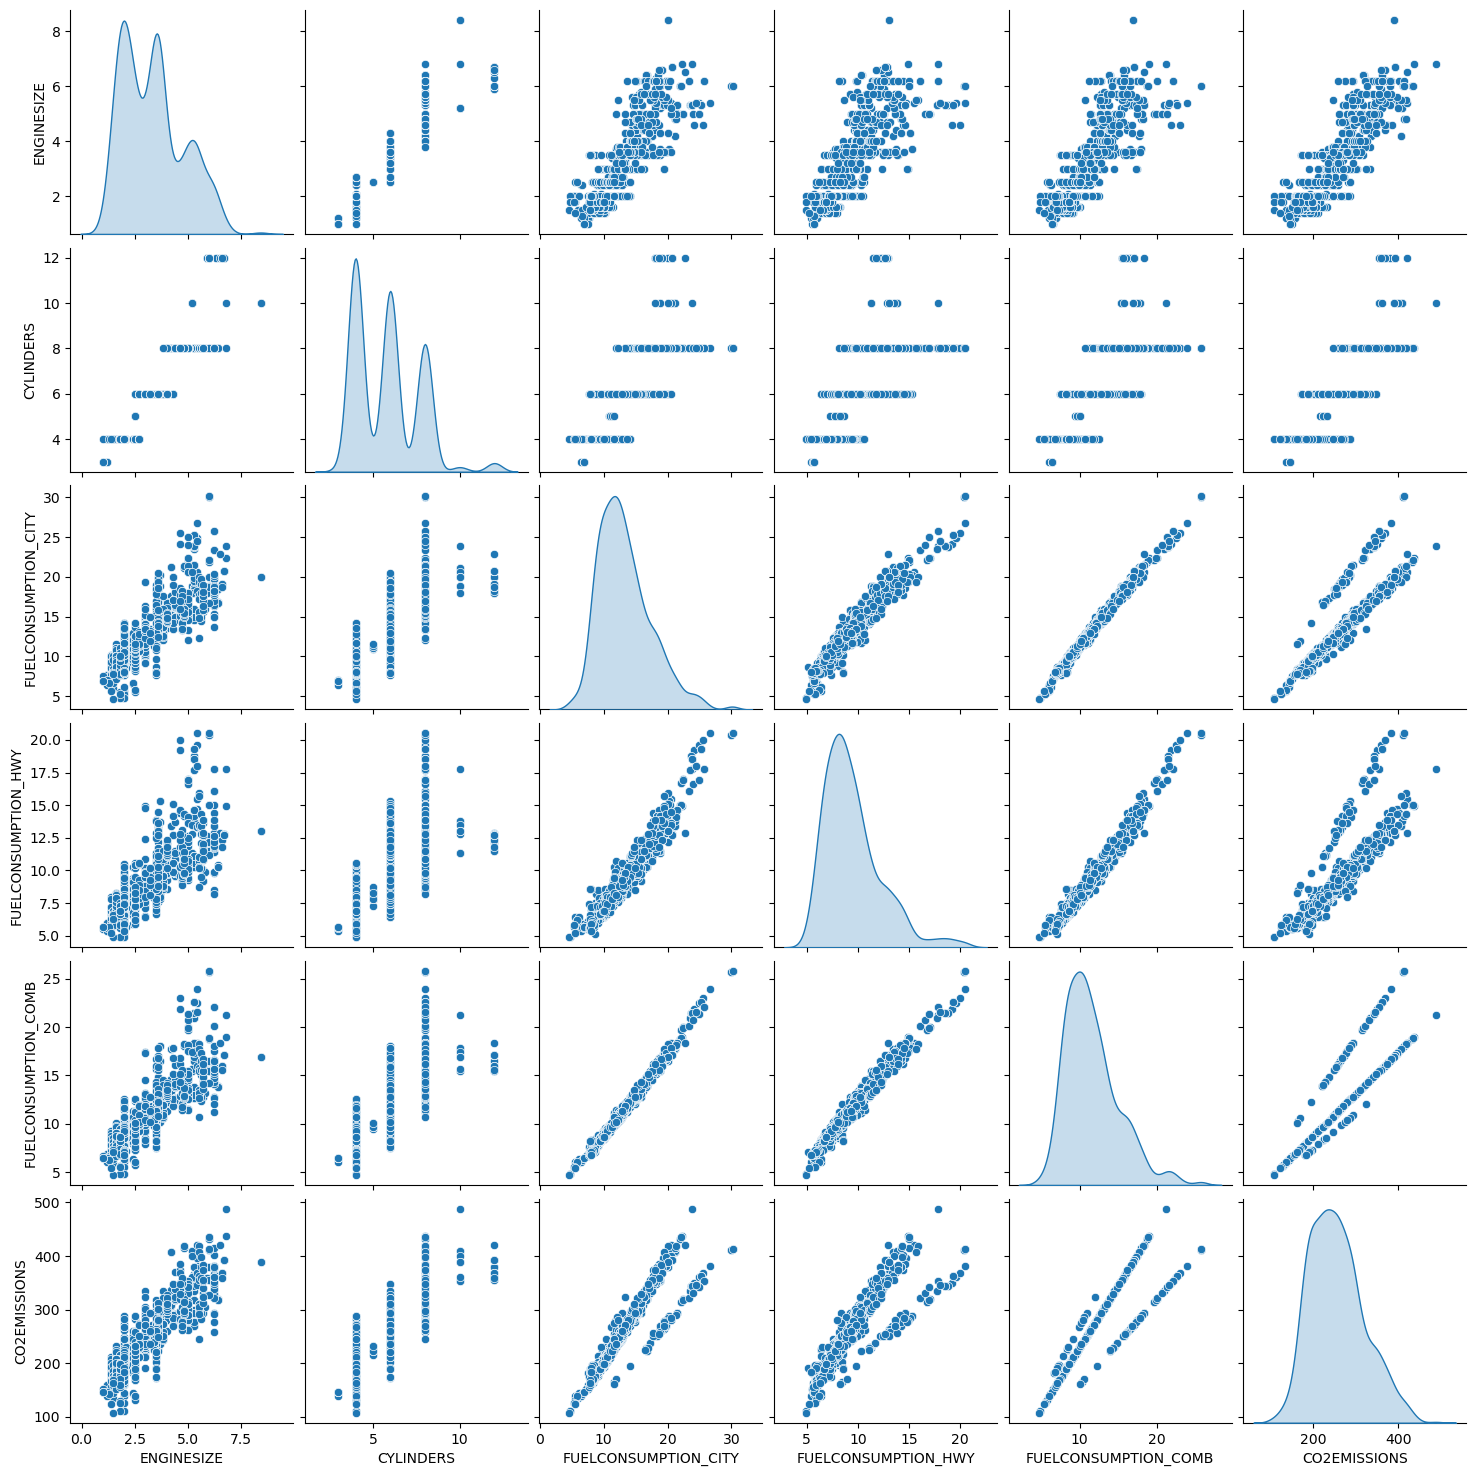

In [43]:
sns.pairplot(cdf_MLR, diag_kind = "kde")

##### Assignment for You
How would you increase the size of the pairplot???

#### Building MLR Model

In [44]:
cdf_MLR.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [45]:
import plotly.express as px

fig = px.scatter_3d(cdf_MLR, x='ENGINESIZE', y='FUELCONSUMPTION_CITY', 
        z='CO2EMISSIONS', color = "CYLINDERS")

fig.show()

#### Important: We dont reshape in MLR.

In [46]:
cdf_MLR

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,271
1063,3.2,6,13.2,9.5,11.5,264
1064,3.0,6,13.4,9.8,11.8,271
1065,3.2,6,12.9,9.3,11.3,260


In [47]:
X = cdf_MLR.drop("CO2EMISSIONS", axis = 1)
y = cdf_MLR['CO2EMISSIONS']

In [48]:
X.shape

(1067, 5)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (853, 5) (853,)
Test set: (214, 5) (214,)


In [50]:
cdf_MLR.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [51]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
834,3.7,6,13.0,9.5,11.4
66,2.0,4,11.5,8.8,10.3
983,3.5,6,12.6,9.4,11.2
849,3.5,6,13.2,10.1,11.8
110,4.4,8,15.0,9.8,12.7
...,...,...,...,...,...
631,2.0,4,12.7,9.7,11.4
285,5.7,8,16.1,10.0,13.4
15,4.7,8,18.1,12.2,15.4
503,1.6,4,8.7,6.4,7.7


In [52]:
y_test

834    262
66     237
983    258
849    271
110    292
      ... 
631    262
285    308
15     354
503    177
725    224
Name: CO2EMISSIONS, Length: 214, dtype: int64

In [53]:
ML_regr = linear_model.LinearRegression()
ML_regr.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', ML_regr.coef_)
print ('Intercept: ', ML_regr.intercept_)

Coefficients:  [10.30861121  7.29570044 -3.97894287 -5.17101066 18.54724504]
Intercept:  66.28573190002865


As mentioned before, **Coefficient** and **Intercept**  are the parameters of the fitted line.
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)

OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:

*   Solving the model parameters analytically using closed-form equations
*   Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

#### Prediction

In [54]:
y_pred = ML_regr.predict(X_test)

In [55]:
y_pred

array([258.78953087, 215.85964317, 255.12703784, 260.24831168,
       295.19918921, 255.78807948, 160.88437705, 186.94562042,
       317.54396603, 262.83944412, 217.49344573, 251.74690884,
       314.17765211, 255.26902783, 204.76710788, 314.41573103,
       283.37667793, 331.97797231, 390.3760366 , 251.74690884,
       231.88923777, 262.20313628, 204.28303858, 252.63243896,
       322.48102534, 198.48161641, 222.82839933, 263.30591269,
       186.12704863, 201.42001064, 338.02816658, 210.76310313,
       248.27024627, 189.48612036, 270.63953137, 185.47993207,
       189.48612036, 255.93341048, 332.54927241, 304.28615187,
       212.91044022, 265.02232373, 263.00249138, 228.49484904,
       333.27565644, 197.48768823, 257.18185254, 217.80020804,
       251.08586719, 307.66260522, 263.45124369, 305.72824677,
       200.97621529, 342.18497747, 318.70127611, 369.29524825,
       202.64923602, 298.85753012, 213.43110782, 209.88448055,
       215.2125266 , 208.28036874, 308.1306579 , 310.66

In [56]:
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

# The mean absolute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination(r2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 407.97
Mean absolute error: 14.47
Coefficient of determination(r2): 0.89
